# **Easy VISA Project**

#### **Phase 3: Data Preprocessing**

#### 3.1 Create new features that may help improve the model's performance

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split

In [59]:
def load_data():
    data = pd.read_csv("cleaned_visa.csv")
    copied_data = data.copy()
    return copied_data

df = load_data()

In [60]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [61]:
# selecting numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

##### Feature Engineering

In [ ]:
def feature_engineering(data):
    data['wage_per_employee'] = data

In [62]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


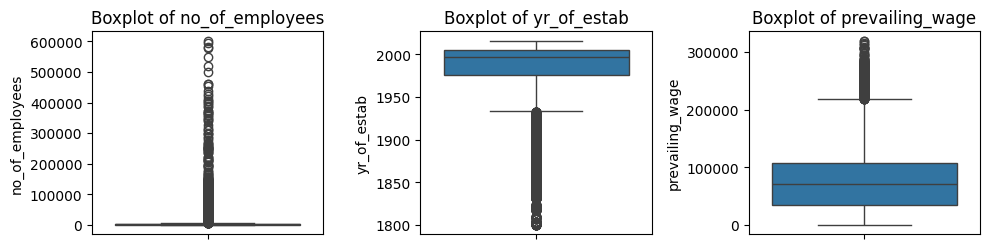

In [63]:
plt.figure(figsize = (10, 7))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df, y = col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


All three variables show skewness and many outliers:

The data is not normally distributed.

Most values are concentrated near the lower end, with a few large or extreme values stretching the scale upward.

This pattern implies that transformations (e.g., log-scaling) or outlier handling may be needed before modeling or statistical analysis.

In [64]:
# function to remove outliers
def remove_outliers(data, columns):
    "removing outliers from columns using IQR method"

    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr 
        upper_bound = q3 + 1.5 * iqr 

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data


# q1 = df[numerical_cols].quantile(0.25)
# q3 = df[numerical_cols].quantile(0.75)
# iqr = q3 - q1

# defining lower bounds
# df = df[~((df[numerical_cols] < (q1 - 1.5 * iqr)) | (df[numerical_cols] > (q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
cleaned_data = remove_outliers(df, numerical_cols)

print(f"Original shape of data: {df.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

df = cleaned_data

Original shape of data: (25480, 11)
Cleaned data shape: (20530, 11)


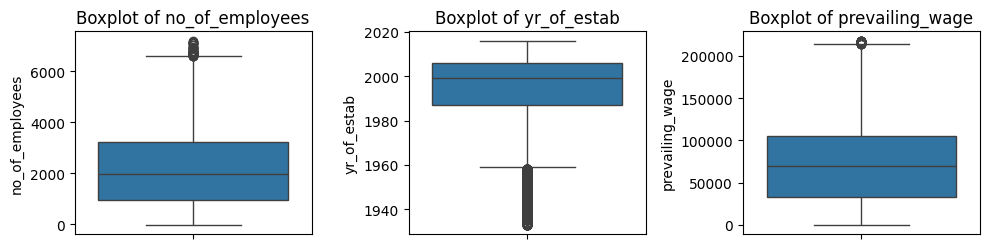

In [66]:
plt.figure(figsize = (10, 7))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df, y = col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [67]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified


c:\Users\ncc\Desktop\ai_engineering_tasks\myvenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


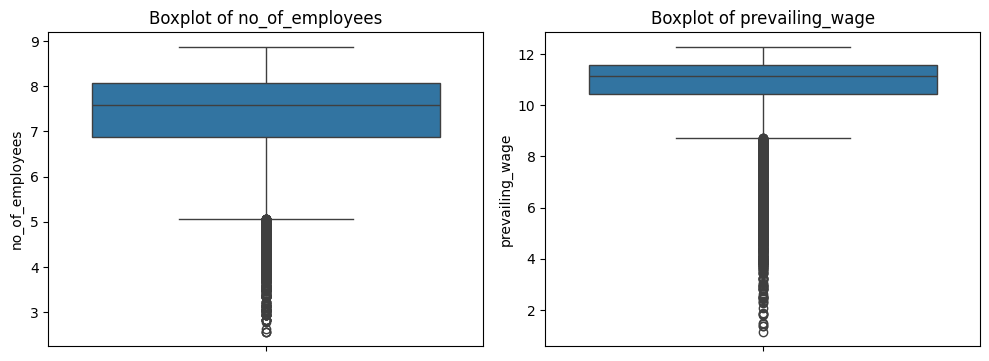

In [68]:
# applying log transformation
numeric_cols = [x for x in df.columns if df[x].dtype in ["int64", "float64"]]
numeric_cols.remove('yr_of_estab')

# df['no_of_employees'] = np.log1p(df['no_of_employees'])
# df['prevailing_wage'] = np.log1p(df['prevailing_wage'])
for col in numeric_cols:
    df[col] = np.log1p(df[col])

# for col in numeric_cols:
#     sns.boxplot(df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

plt.figure(figsize = (10, 7))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df, y = col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

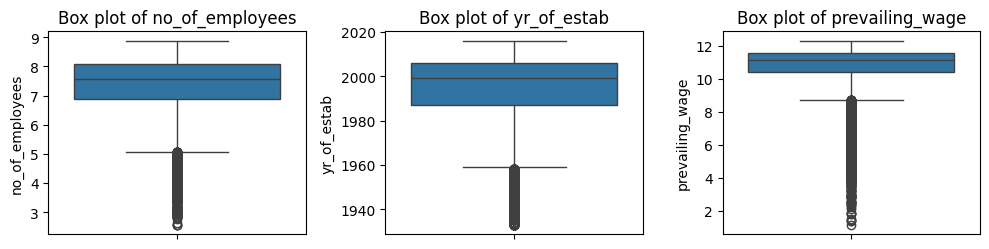

In [69]:
# final outlier check

numerical_columns = [x for x in df if df[x].dtype in ["int64", "float64"]]

plt.figure(figsize = (10, 7))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df, y = col)
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

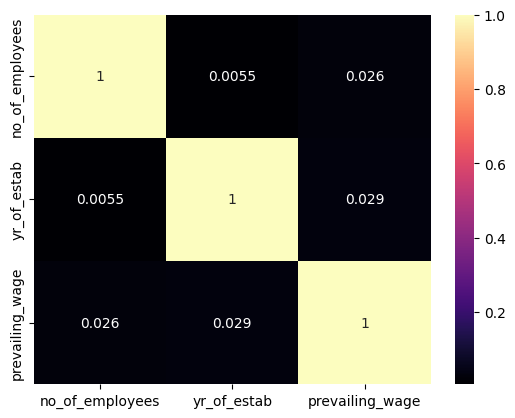

In [70]:
corr_matrix = df[['no_of_employees', 'yr_of_estab', 'prevailing_wage']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'magma')
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20530 entries, 1 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              20530 non-null  object 
 1   education_of_employee  20530 non-null  object 
 2   has_job_experience     20530 non-null  object 
 3   requires_job_training  20530 non-null  object 
 4   no_of_employees        20498 non-null  float64
 5   yr_of_estab            20530 non-null  int64  
 6   region_of_employment   20530 non-null  object 
 7   prevailing_wage        20530 non-null  float64
 8   unit_of_wage           20530 non-null  object 
 9   full_time_position     20530 non-null  object 
 10  case_status            20530 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.9+ MB


In [72]:
df['case_status'].value_counts()

case_status
Certified    13667
Denied        6863
Name: count, dtype: int64

In [73]:
# encoding target variable
df['case_status'] = df['case_status'].map({"Certified": 1, "Denied": 0})

In [74]:
df['case_status'].value_counts()

case_status
1    13667
0     6863
Name: count, dtype: int64

In [78]:
# encoding categorical variables

l_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = l_encoder.fit_transform(df[col])